**Задание**

Цель: применить на практике методы по оценке качества данных.
Описание задания:
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

**Этапы работы:**

1. Получите и загрузите данные.
2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.
3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.
   
 a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
    
 b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

6.Категориальные переменные переведите в цифровые значения. Можно использовать [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), [preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Старайтесь не использовать для этой задачи циклы.

7. Проверьте данные на наличие выбросов.

8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

9. *Попробуйте математически преобразовать признак Age.

10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

11. Сформулируйте выводы по проделанной работе.
 
 a) Кратко опишите какие преобразования были сделаны и почему.

 b) Сравните метрики моделей из п. 2 и п. 10.
 
 c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?
Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.

**Результат:** применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

warnings.filterwarnings('ignore')


#  1 Получите и загрузите данные.

In [187]:
# Загрузка датасета из csv файла
df = pd.read_csv('source/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Описание полей**:

PassengerId: идентификатор пассажира

Survived: флаг выживания (0 - не выжил, 1 - выжил)

Pclass: класс каюты (1, 2, 3)

Name: имя пассажира

Sex: пол пассажира

Age: возраст пассажира
SibSp: количество братьев/сестер/супругов на борту

Parch: количество родителей/детей на борту

Ticket: номер билета

Fare: цена билета

Cabin: номер каюты

Embarked: порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)

# 2 Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

## Сначала оценим дизбаланс классов

In [188]:
# Выведем соотношение классов
class_counts = df["Survived"].value_counts()
class_counts

0    549
1    342
Name: Survived, dtype: int64

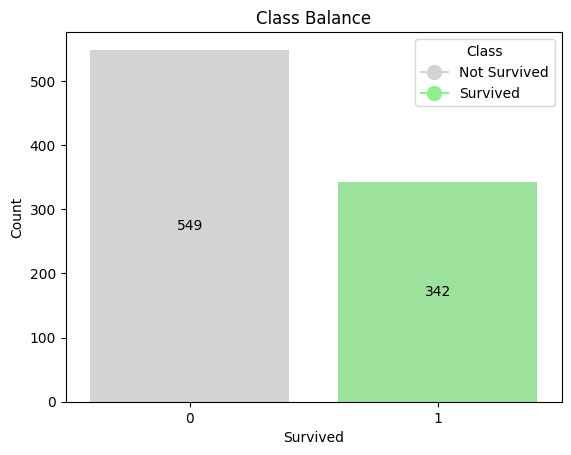

In [189]:
# Визуализируем соотношение классов

sns.barplot(x=class_counts.index, y=class_counts.values, palette=["lightgrey", "lightgreen"])
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Class Balance")

# Add the count values in the center of each bar
for i in range(len(class_counts)):
    plt.text(x=i, y=class_counts.values[i]/2, s=str(class_counts.values[i]), ha="center", va="center")

# Add a legend
legend_patches = [plt.Line2D([0], [0], marker="o", color="lightgrey", label="Not Survived", markersize=10),
                  plt.Line2D([0], [0], marker="o", color="lightgreen", label="Survived", markersize=10)]

plt.legend(handles=legend_patches, title="Class")
plt.show()

"plt.Line2D" - вызывает функцию создания линейного графика.

"[0], [0]" - задает начальные координаты графика.

"marker="o", color="red" - определяет форму и цвет маркеров на графике.

"label="Not Survived"" - задает подпись к графику.

"markersize=10" - задает размер маркеров на графике.

## Из графика видим, что классы имеют сильный дизбаланс, поэтому для оценки качества я выбрал метрику ROC-AUC score.

In [190]:
# Удаляем пропуски
df.dropna(inplace=True)
df = df.drop(['PassengerId'], axis=1) # Удалю техническое поле, т.к. оно не влияет на таргет.

In [191]:
# Удаляем категориальные переменные
df = df.select_dtypes(exclude=['object'])

In [192]:
# Выделим признаки и таргет
X = df.drop('Survived', axis=1)
y = df['Survived']

# Разобьем данные на тренировочные и тестовые сеты
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Обучим модель
model = LogisticRegression()
model.fit(X_train, y_train)

# Произведем предсказание
y_pred = model.predict_proba(X_test)

Для получения более полной картины качества классификации вы можете использовать classification_report из модуля scikit-learn. Вы получите значения таких метрик, как precision, recall, f1-score и support.



In [193]:
# Вывожу classification report по основным метрикам:precision, recall, f1-score, support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.18      0.26        17
           1       0.55      0.85      0.67        20

    accuracy                           0.54        37
   macro avg       0.52      0.51      0.46        37
weighted avg       0.53      0.54      0.48        37



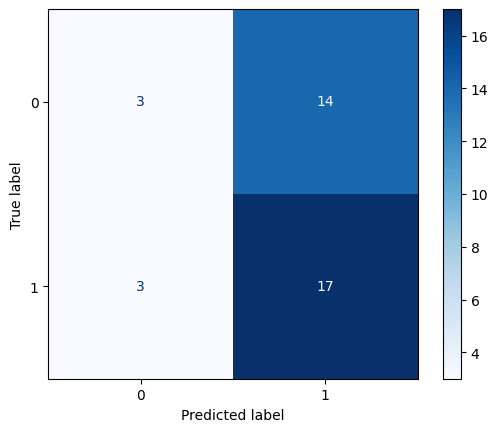

In [194]:
# График матрицы ошибок
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')
plt.show()

In [195]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.513235294117647


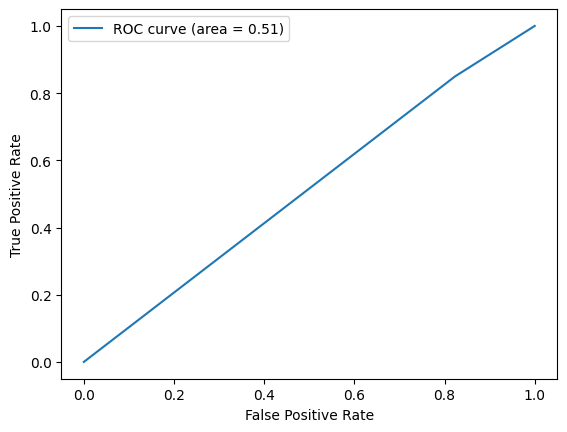

In [196]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 3 Снова загрузите полные данные

In [197]:
df = pd.read_csv('source/train.csv')

# 4 удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


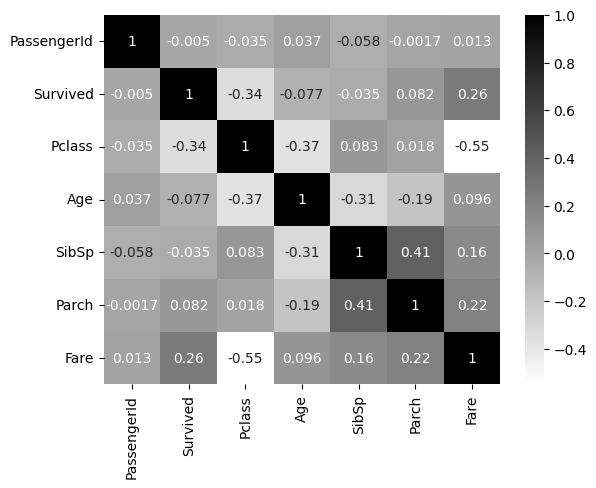

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='gist_gray_r')
plt.show()

In [200]:
print(f'В поле Cabin пропущенных значений {df.Cabin.isnull().sum()} из {df.shape[0]} записей')

В поле Cabin пропущенных значений 687 из 891 записей


Например, в датасете Титаник признаки Cabin, Ticket, PassengerId можно удалить, так как они логически не влияют на целевую переменную Survived.

* Cabin не влияет значимо на Survived, потому что много значений этого признака пропущено, и для многих пассажиров не известно, в какой каюте они находились. Также, расположение каюты может не влиять на шансы выжить в зависимости от ситуации и действий на борту.Поэтому, включение этого признака в модель может принести больше вреда, чем пользы.

* Ticket не влияет напрямую на целевую переменную Survived, поскольку этот признак обычно представляет собой номер билета, который может быть случайным и не иметь значения для выживаемости пассажира.

*  PassengerId - это техническое поле, которое предоставляет информацию только о том, какому пассажиру принадлежит эта запись, а не информацию о его выживаемости.

* Name в качестве признака может быть удалено из модели, потому что имена пассажиров не имеют прямой корреляции с их шансом выжить. Они могут иметь какую-либо статистическую связь с другими признаками, такими как класс каюты, пол или экономический статус, но это может быть выражено в других признаках, поэтому имена могут быть удалены без потери важной информации.
* SibSp имеют низкую корреляцию Пирсона с таргетом, поэтому этот показатель также не стал включать в целевые признаки 

In [201]:
df = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'SibSp' ], axis=1)

# 5 Проверьте данные на наличие пропущенных значений.

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [202]:
# Посчитаем количество пропущенных значений
missing_values_count = df.isnull().sum().sort_values(ascending=False)

In [203]:
# Посчитаем процент пропущенных значений для каждого столбца
missing_values_percent = (df.isnull().mean().sort_values(ascending=False)*100)

In [204]:
# Выведем результат
print("Количество пропущенных значений:")
print(missing_values_count)
print("\n")
print("Процент пропущенных значений:")
print(missing_values_percent.round(1))

Количество пропущенных значений:
Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
Parch         0
Fare          0
dtype: int64


Процент пропущенных значений:
Age         19.9
Embarked     0.2
Survived     0.0
Pclass       0.0
Sex          0.0
Parch        0.0
Fare         0.0
dtype: float64


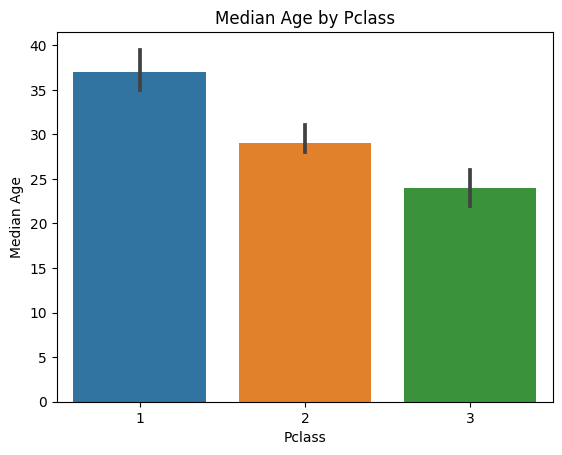

In [205]:
# Посмотрим медианный возраст в разрезе каждой каютной группы Pclass:

sns.barplot(x="Pclass", y="Age", data=df, estimator=np.median)

# Добавляю заголовок и название осей 
plt.title("Median Age by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Median Age")
plt.show()

Из построенного графика видно, что медианный возраст в каждой группе различен. Существует явная зависимость - чем выше класс каюты (самый высокий класс - первый), тем выше медианный возраст пассажиров. Это может указывать на то, что более богатые пассажиры были старше на корабле.

В связи с этим пропущенные значения в поле "Age" лучше заполнять медианой в разрезе каждой каютной группы.

In [206]:
# Заполняю прощенные значения мединным значением в рамках каждой группы Pclass 
df["Age"].fillna(df.groupby("Pclass")["Age"].transform("median"), inplace=True)

С помощью моды можно найти самое часто встречающееся значение в поле Embarked и заполнить пропущенные значения этим значением.

In [207]:
# Найдите моду
mode = df["Embarked"].mode()[0]

# Заполним пропущенных значения
df["Embarked"].fillna(mode, inplace=True)

In [208]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Embarked    0
dtype: int64

Как видим, пропущенных значений не осталось в данных.

# 6 Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

preprocessing.LabelEncoder используется для кодирования категориальных переменных, присваивая каждой категории уникальное целочисленное значение.

pd.get_dummies используется для кодирования категориальных переменных, путем преобразования каждой категории в отдельный бинарный признак (0/1). Таким образом, получается несколько новых столбцов, где каждый столбец представляет собой одну категорию.

In [209]:
import pandas as pd
from sklearn import preprocessing


# Идентификация категориальных переменных
cat_cols = df.select_dtypes(include=["object"]).columns

# Преобразование категориальных переменных с помощью pd.get_dummies
df = pd.get_dummies(df, columns=cat_cols)

# Также можно использовать preprocessing.LabelEncoder
# le = preprocessing.LabelEncoder()
# for col in cat_cols:
#     df[col] = le.fit_transform(df[col])


На мой взгляд, в зависимости от конкретной задачи и входных данных, может потребоваться использовать различные методы преобразования категориальных переменных. Например, если у нас есть несколько категорий с большим количеством уникальных значений, то возможно предпочтительнее использовать pd.get_dummies, так как он позволяет разделить категориальную переменную на несколько бинарных. В других случаях, например, когда количество уникальных значений ограничено, может быть предпочтительнее использовать preprocessing.LabelEncoder, так как он преобразует категориальные переменные в числовые, сохраняя порядок значений.

# 7 Проверьте данные на наличие выбросов.

Для проверки данных на выбросы можно использовать методы базовой статистики или визуальные методы.

Методы базовой статистики:

**1 Расчет медианы и квартилей - этот способ я использовал в данном задании.**

2 Расчет Z-score

3 Визуальные методы:

Ниже приведен пример нахождение выбросов через межквартильный размах:

In [210]:
def remove_outliers_iqr(df):
    for col in df.select_dtypes(include=['float']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

In [211]:
# Исключим из выборки выбросы:
df = remove_outliers_iqr(df)
df

,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,0,7.2500,0,1,0,0,1
2,1,3,26.0,0,7.9250,1,0,0,0,1
3,1,1,35.0,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,8.0500,0,1,0,0,1
5,0,3,24.0,0,8.4583,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,30.0000,1,0,0,0,1
888,0,3,24.0,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,30.0000,0,1,1,0,0


# 8 *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

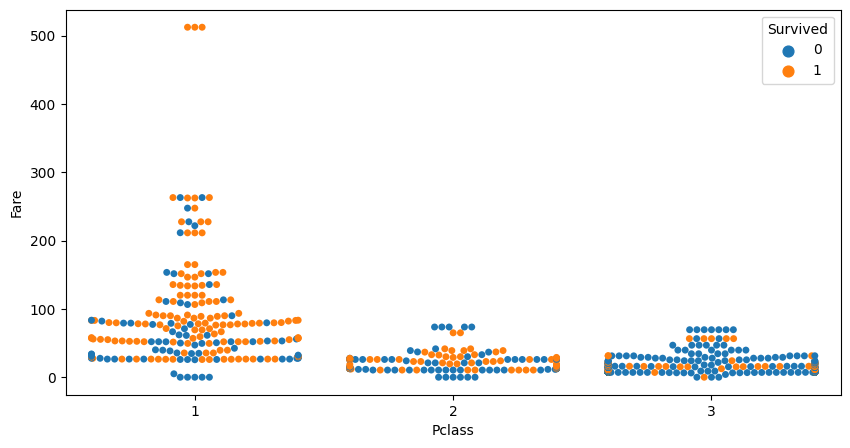

In [212]:
data = pd.read_csv('source/train.csv')

fig = plt.figure(figsize=(10, 5))
sns.swarmplot(x='Pclass', y='Fare', hue='Survived', data=data);

На данной визуализации хорошо видна прямая зависимость между классом и шансом выжить - чем выше класс, тем больше шансов выжить. Скорей всего это связано с тем, что в первую очередь затанули нижние ярусы. Более дешевый сегмент находился ниже и не успел выбраться из кают.

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

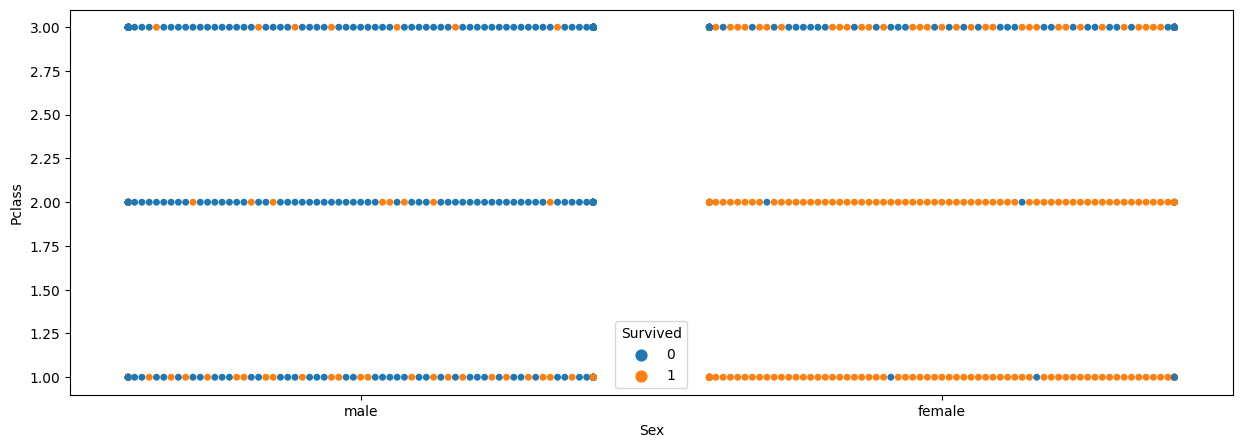

In [213]:
fig = plt.figure(figsize=(15, 5))
sns.swarmplot( x='Sex', y='Pclass', hue='Survived', data=data)

Из данной визуализации видим, что женщины из первого и второго класса практически все спаслись. В то время, как мужчины почти все утанули. Скорей всего, мужчины спасалис женщин и уступали свои места на спасательных лодках. Это факт косвенно говорит о том, что бонально не хватило всем посадочных мест на спасательных лодках. Иначе бы погибших было бы значительно меньше.

#  9 Попробуйте математически преобразовать признак Age.

In [214]:
# Добавим новые признаки:

# Преобразование в логарифм
df['log_age'] = np.log(df['Age'])

# Возведение в квадрат
df['age_squared'] = df['Age']**2

# Извлечение квадратного корня
df['sqrt_age'] = np.sqrt(df['Age'])


В зависимости от задачи и распределения данных, логарифмирование может улучшить их восприятие моделью. Однако, необходимо внимательно отслеживать отрицательные значения и значения, равные 0, так как на них логарифм не определен. В данном случае возраст не может принимать эти значения.

In [215]:
df

,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,log_age,age_squared,sqrt_age
0,0,3,22.0,0,7.2500,0,1,0,0,1,3.091042,484.0,4.690416
2,1,3,26.0,0,7.9250,1,0,0,0,1,3.258097,676.0,5.099020
3,1,1,35.0,0,53.1000,1,0,0,0,1,3.555348,1225.0,5.916080
4,0,3,35.0,0,8.0500,0,1,0,0,1,3.555348,1225.0,5.916080
5,0,3,24.0,0,8.4583,0,1,0,1,0,3.178054,576.0,4.898979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,0,1,0,0,1,3.295837,729.0,5.196152
887,1,1,19.0,0,30.0000,1,0,0,0,1,2.944439,361.0,4.358899
888,0,3,24.0,2,23.4500,1,0,0,0,1,3.178054,576.0,4.898979
889,1,1,26.0,0,30.0000,0,1,1,0,0,3.258097,676.0,5.099020


# 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [216]:
# Выделим признаки и таргет
X = df.drop('Survived', axis=1)
y = df['Survived']


# Разобьем данные на тренировочные и тестовые сеты
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Обучим модель
model = LogisticRegression()
model.fit(X_train, y_train)

# Произведем предсказание
y_pred = model.predict_proba(X_test)

In [217]:
roc_auc_transformed = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", roc_auc_transformed)

ROC-AUC: 0.7101325757575757


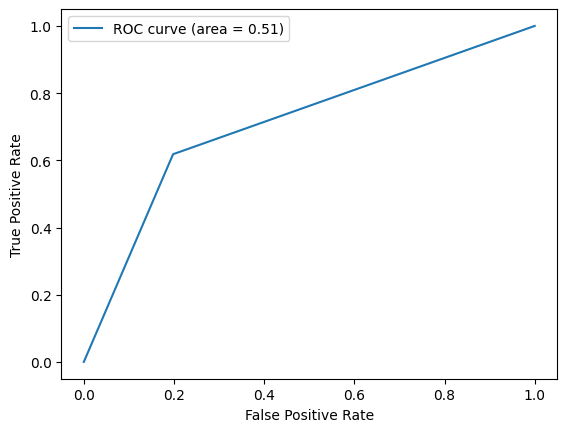

In [218]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 11. Сформулируйте выводы по проделанной работе.
 
 a) Кратко опишите какие преобразования были сделаны и почему.

 b) Сравните метрики моделей из п. 2 и п. 10.
 
 c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?
Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.

## a) Кратко опишите какие преобразования были сделаны и почему.

**Удалены признаки логически не влияющие на целевую переменную Survived.**

Признаки, которые не коррелируют с целевой переменной, должны быть удалены из модели, потому что они не вносят вклад в точность предсказания и даже могут привести к переобучению и ухудшению качества модели. Кроме того, наличие некоррелированных признаков увеличивает время вычислений, снижает интерпретируемость модели и добавляет шум. Удаление некоррелированных признаков позволяет сделать модель проще, быстрее и более интерпретируемой, что приводит к лучшим результатам.

**Устранены пропуски в данных**

Заполнение пропусков необходимо, чтобы повысить качество и достоверность данных, которые используются в анализе или моделировании. Пропущенные значения могут привести к искажению результатов или даже к невозможности проведения анализа. 

**Добавлены 3 новых признака на основе поля "Age"**

Добавление новых признаков, основанных на существующих, может повысить точность модели предсказания, добавить дополнительную информацию для оценки, помочь выявить важные тенденции и зависимости в данных. Это также может улучшить интерпретируемость модели и упростить ее оценку.



## b) Сравните метрики моделей из п. 2 и п. 10.

In [219]:
print(f'До преобразование данных (на исходных данных) метрика качества ROC_AUC = {roc_auc:.2f}')
print(f'После вышеописанных преобразований качество ROC_AUC_transformed = {roc_auc_transformed:.2f}')

До преобразование данных (на исходных данных) метрика качества ROC_AUC = 0.51
После вышеописанных преобразований качество ROC_AUC_transformed = 0.71


Вывод: видим, что после преобразовани качество модели стало лучше.

## c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные? Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.

Да, необходимо обрабатывать данные перед построением модели машинного обучения. Обработка данных позволяет улучшить качество модели, устранить аномалии в данных, усилить зависимость между признаками и целевым признаком, улучшить интерпретацию модели.

Для больших данных, аналогичные операции тоже могут пригодиться, так как большой объем данных может привести к усложнению модели, увеличению времени обучения и ухудшению ее качества.